In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [85]:
df = pd.read_csv("C:\\Users\\prane\\Downloads\\Breast_Cancer (1).csv")
print(df.shape)
df.head

(4024, 16)


<bound method NDFrame.head of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        

In [86]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [109]:
distinct_labels2 = df['6th Stage'].unique()
distinct_labels2

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [113]:
distinct_labels1 = df['A Stage'].unique()
distinct_labels1

array(['Regional', 'Distant'], dtype=object)

In [89]:
print(df['T Stage '].isna().sum())

0


In [90]:
print(df['N Stage'].isna().sum())

0


In [91]:
print(df['Estrogen Status'].isna().sum())

0


In [92]:
df['Estrogen Status'] = df['Estrogen Status'].map({'Positive': 1, 'Negative' : 0})

In [93]:
df['T Stage '] = df['T Stage '].map({'T1': 1, 'T2' : 2, 'T3' : 3, 'T4' : 4})

In [94]:
df['Progesterone Status'] = df['Progesterone Status'].map({'Positive': 1, 'Negative' : 0})

In [108]:
df['Marital Status'] = df['Marital Status'].map({'Married':1, 'Divorced':2, 'Single ':3, 'Widowed':4, 'Separated':5})

In [95]:
df['Status'] = df['Status'].map({'Alive': 1, 'Dead' : 0})

In [110]:
df['6th Stage'] = df['6th Stage'].map({'IIA':1, 'IIIA':3, 'IIIC':5, 'IIB':2, 'IIIB':4})

In [96]:
df['N Stage'] = df['N Stage'].map({'N1': 1, 'N2' : 2, 'N3' : 3, 'N4' : 4})

In [112]:
df['differentiate'] = df['differentiate'].map({'Poorly differentiated':2, 'Moderately differentiated':3, 'Well differentiated':4, 'Undifferentiated':1})

In [106]:
df['Race'] = df['Race'].map({'White' : 1, 'Black':2, 'Other':3})

In [114]:
df['A Stage'] = df['A Stage'].map({'Regional':0, 'Distant':1})

In [97]:
df['Grade'] = df['Grade'].map({'1' : 1, '2' : 2, '3' : 3, ' anaplastic; Grade IV': 4})

In [115]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,2,3,0,4,1,1,24,1,60,1
1,50,1,1,2,2,3,3,2,0,35,1,1,14,5,62,1
2,58,1,2,3,3,5,3,2,0,63,1,1,14,7,75,1
3,58,1,1,1,1,1,2,3,0,18,1,1,2,1,84,1
4,47,1,1,2,1,2,2,3,0,41,1,1,3,1,50,1


<AxesSubplot:>

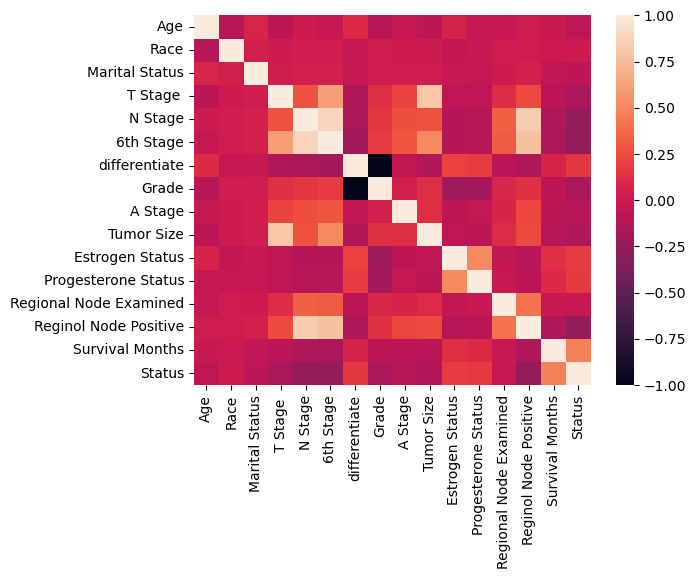

In [116]:
corematrix = df.corr()
round(corematrix,2)
sns.heatmap(corematrix)

In [99]:
#split into X/y
X = df[["T Stage ", "N Stage"]]
y = df["Grade"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [100]:
#Building machine learning model 
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.03196623654026631

In [104]:
#Aim 2
#split into X/y
X = df[["T Stage ", "N Stage", "Estrogen Status", "Progesterone Status", "Tumor Size", "Grade"]]
y = df["Status"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

#Building machine learning model 
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.13078054709850329

In [119]:
# different age groups
from scipy import stats

# Before conducting an ANOVA test, we need to define age groups. For simplicity, let's create 3 age groups:
# 1. Less than 40 years
# 2. 40 to 60 years
# 3. Older than 60 years
# We'll assume that we want to compare the mean tumor size across these age groups.

# Define the age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 40, 60, float('inf')], labels=['<40', '40-60', '>60'], right=False)

# Group the data by these age groups and collect the tumor sizes for each group
tumor_sizes_by_age_group = [group['Grade'].values for name, group in df.groupby('Age Group')]

# Perform one-way ANOVA test
anova_result = stats.f_oneway(*tumor_sizes_by_age_group)

anova_result


F_onewayResult(statistic=21.388111910150403, pvalue=5.758656065939025e-10)

In [121]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# We will conduct the Tukey's HSD post-hoc test to find out which age groups differ from each other
tukey_result = pairwise_tukeyhsd(endog=df['Grade'], groups=df['Age Group'], alpha=0.05)

# Display the results of the Tukey's HSD test
tukey_result.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
40-60,<40,0.2286,0.0,0.1261,0.3312,True
40-60,>60,-0.0653,0.0077,-0.1165,-0.0142,True
<40,>60,-0.294,0.0,-0.4006,-0.1874,True
